# 2DEG mobility calculation using analytical formula

Ref-1: J. Bassaler, J. Mehta, I. Abid, L. Konczewicz, S. Juillaguet, S. Contreras, S. Rennesson, S. Tamariz, M. Nemoz, F. Semond, J. Pernot, F. Medjdoub, Y. Cordier, P. Ferrandis, Al-Rich AlGaN Channel High Electron Mobility Transistors on Silicon: A Relevant Approach for High Temperature Stability of Electron Mobility. Adv. Electron. Mater. 2024, 2400069. https://doi.org/10.1002/aelm.202400069

Ref-2: Zhang, J., Hao, Y., Zhang, J. et al. The mobility of two-dimensional electron gas in AlGaN/GaN heterostructures with varied Al content. Sci. China Ser. F-Inf. Sci. 51, 780–789 (2008). https://doi.org/10.1007/s11432-008-0056-7


# 1. Settings

## 1.1 Import modules

In [8]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
sys.path.insert(0, r'C:\Users\badal.mondal\Desktop\mobility_2DEG\mobilitypy')
from mobilitypy import Mobility2DEG

## 1.2 Set physical constants

In [52]:
'''
n_2d => in nm^-2
rms_roughness => nm^-1
corr_len => nm^-1
n_dis => nm^-2
f_dis => unit less
'''
alloy_disordered_effect=1
interface_roughness_effect=1
dislocation_effect=1
deformation_potential_effect=1 
piezoelectric_effect=1
acoustic_phonon_effect=1
polar_optical_phonon_effect=1
total_mobility=1
mobility_model='Bassaler'
density_2deg = 0.1 # nm^-2
irf_rms_roughness = 0.3 # nm
irf_corr_length = 3.0 # nm
dislocation_density = 1e-4 # nm^-2
occup_dislocation = 0.3
T=300 #K

# 2. Calculate mobilities

In [56]:
mu2deg = Mobility2DEG(compositions=None, binaries=['AlN', 'GaN'], alloy='AlGaN', system='ternary')
mobility_df = mu2deg.calculate_mobility(n_2d=density_2deg, rms_roughness=irf_rms_roughness, 
                                        corr_len=irf_corr_length, n_dis=dislocation_density, 
                                        f_dis=occup_dislocation, T=T,
                                        alloy_disordered_effect=alloy_disordered_effect,
                                        interface_roughness_effect=interface_roughness_effect,
                                        dislocation_effect=dislocation_effect,
                                        deformation_potential_effect=deformation_potential_effect,
                                        piezoelectric_effect=piezoelectric_effect,
                                        acoustic_phonon_effect=acoustic_phonon_effect,
                                        polar_optical_phonon_effect=polar_optical_phonon_effect,
                                        total_mobility=total_mobility,
                                        mobility_model=mobility_model)

# 3. Plot mobilities

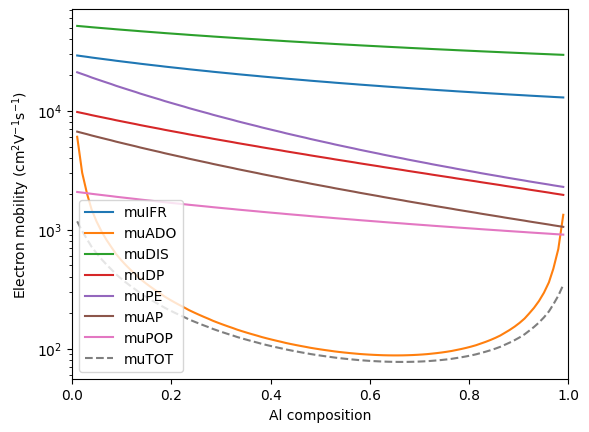

In [57]:
fig, ax = plt.subplots()
comp_ = np.array(mobility_df.index, dtype=float)
for mu in list(mobility_df)[:]:
    if mu == 'muPOP' and T < 100: continue
    ls='--' if 'TOT' in mu else '-'
    ax.plot(comp_, mobility_df[mu], ls=ls, label=mu)
ax.set_ylabel(r'Electron mobility ($\mathrm{cm}^2\mathrm{V}^{-1}\mathrm{s}^{-1}$)')
ax.set_xlabel('Al composition')
ax.set_yscale('log')
#ax.set_ylim(1e1,1e6)
ax.set_xlim(0,1)
ax.legend()

#### SI. Questions
SI.1 Which alloy effective mass to use? Barrier alloy or channel alloy?